# **시계열 2**

# 1. 단변량 시계열 분석

## 1-1. 안정적 시계열 분석

### 1. 자기 회귀 모델 (Autoregressive Model, AR)

자기 회귀 : 과거 자신의 값들을 독립변수x로 삼아 현재 값 y를 예측하는 회귀
- 시계열 데이터의 자기상관성을 활용

$$
AR(p):  y_{t}=c +\phi _1y_{t-1}+\phi_2y_{t-2}+...+\phi _py_{t-p}+\varepsilon _t
$$

- p차 자기 회귀 모형
- 과거 p개 시점의 데이터의 선형 조합을 이용해 예측하는 모델
- p=1 일때,
    - y의 현재값은 1 시점 이전의 y값의 형향을 받는다
    - 데이터의 특성에 따라 1시점은 달라짐
- 회귀랑 다르게, 자체가 시계열 예측용 모델이라 예측값을 사용하는 구조가 모델 설계에 포함됨

### 2. 이동 평균 모델 (Moving Average, MA)

과거 시점의 잔차($\varepsilon$)를 독립변수로 삼아 현재 값을 예측하는 모델
- 잔차 : 실제 값과 예측 값의 차이
- 잔차들은 모두 백색잡음 & 서로 독립적임
    - 백색잡음 : 평균이 0, 분산이 일정, 과거 값에 영향을 받지 않고 오로지 외부 충격에 의해서만 결정

$$
MA(q): y_t = \mu +\varepsilon _t+ \theta _1\varepsilon_{t-1}+\theta_2\varepsilon_{t-2}+...+\theta_q\varepsilon_{t-q}
$$

- q차 이동 평균 모형
- 과거 q개의 예측 오차의 선형 결합으로 예측하는 모델
- q=1 일떄,
    - y의 현재 값은 1 시점 이전의 오차에 영향을 받는다

### 3. AR, MA 모델의 전제 조건

#### 1. 정상성
- AR 모델의 정상성 조건
    - 특성 방정식 $1 - \phi_1 z - \phi_2 z^2 - \cdots - \phi_p z^p = 0$ 에서
    - 모든 해의 절댓값이 1보다 크면 AR의 정상성이 확보됨
    - 보통은 AR(1), AR(2) 까지만 활용하므로 두 조건만 알아도 충분하긴함
    - AR(1) -> $|\phi|<1$
    - AR(2) -> $|\lambda_1|<1, |\lambda_2|<1$
- MA 모형은 정상성을 만족하는 찬사들의 조합이므로 항상 정상성을 만족한다

#### 2. 가역성
- 가역성 : MA 모형을 AR형태로 재표현할 수 있는지 여부 =  $\varepsilon_t$ 를 $y_t$, $y_{t-1}$, … 로 다시 표현할 수 있는가
- MA 모형의 가역성 만족 조건
    - MA 모형에서는 t 시점의 값을 과거 시점의 오차항 $\varepsilon$으로 표현
    - 오차항 $\varepsilon$도 과거 관측값($y_{t-n}$)으로 표현할 수 있어야 안정적이다
    - 특성방정식 $1 + \theta_1 z + \cdots + \theta_q z^q = 0$ 에서 모든 해의 절대값이 1보다 크면 가역성 확보
- AR 모형은 처음부터 AR 형태이기 때문에 가격성 체크할 필요 음

### 4. ARMA (Autoregressive Moving Average) 모형

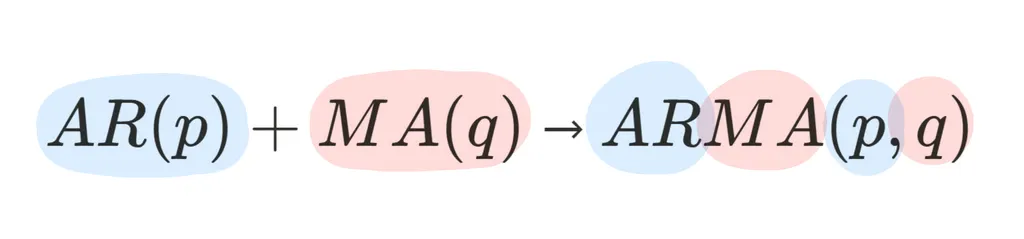

$AR(p)$ 모형과 $MA(q)$ 모형을 결합한 모형
- 과거 p개의 관측값 + 과거 q개의 오차를 활용해서 예측하는 방법
- AR 모형의 정상성과 MA 모형의 가역성을 모두 만족해야 한다

- ARMA(p, 0) ⇒ AR(p)와 동일

- ARMA(0, q) ⇒ MA(q)와 동일

- ARMA(0, 0) ⇒ 백색 잡음 모델 ($y_t = \varepsilon_t$)과 동일


### 5. 차수 결정 방법 : 자기 상관 함수

두 그래프를 통해 현재 값이 과거 값과 어떤 관계가 있는지 파악하고 이를 통해 AR, MA, ARMA의 적절한 차수(p, q)를 결정

#### 자기 상관 계수 (Auto Correlation Function, ACF)

- ARMA(p, q)모형에서 사용할 q개의 오차 결정 방법
- 두 시점 사이의 상관 관계 파악 - 간접 영향까지 모두 파악

$$
ACF(k) = \text{Corr}(y_t, y_{t-k})
$$

시차(lag) k에 대해서, 두 관측치 간의 상관 관계를 나타내는 함수

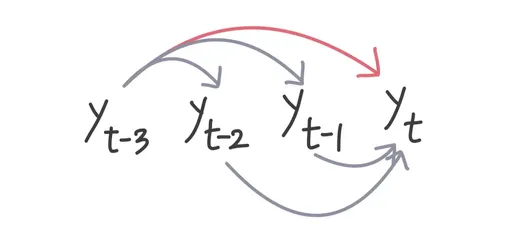

#### 부분 자기 상관 계수 (Partial Autocorrelation Function, PACF)

- ARMA(p, q) 모형에서 사용할 p개의 시점 결정 방법
- 두 시점 사이의 직접적인 영향만 파악

$$
PACF(k) = Corr(e_t, e_{t-k})
$$

시차(lag) k에 대해서, 두 시점 사이의 순수한 상관 관계를 나타내는 함수

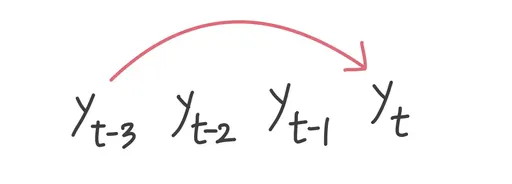

#### ACF와 PCAF로 차수 및 모형 결정하기

|  | **ACF 그래프** 모습 | **PACF 그래프** 모습 |
| --- | --- | --- |
| **AR(p) (= ARMA(p, 0))
사용**해야 할 때 | 천천히 감소 or 진동 감소 | p+1 시점부터 0에 근접 |
| **MA(q) (= ARMA(0, q))
사용**해야 할 때 | q+1 시점부터 0에 근접 | 천천히 감소 or 진동 감소 |
| **ARMA(p, q) 사용**해야 할 때 | q+1 시점부터 0에 근접 | p+1 시점부터 0에 근접 |

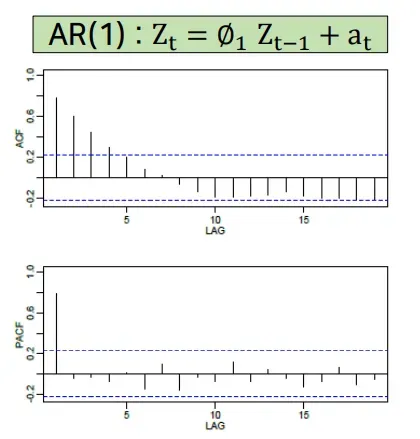

ACF 그래프는 천천히 감소     
PACF 그래프는 시점 1 이후는 신뢰 구간 안에 들어와 있음

따라서 적절한 차수 : p=1, q=0 -> ARMA(1,0) = AR(1)

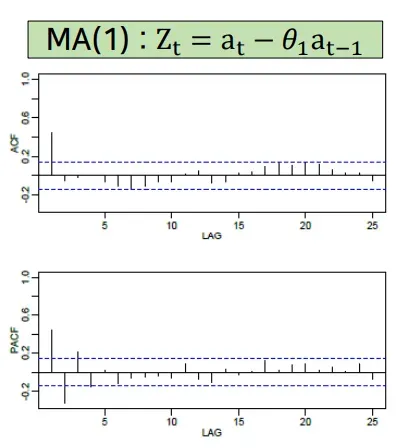

ACF 그래프가 시점 1 이후 모두 신뢰구간 안에 들어와있음    
PACF 그래프는 천천히 감소

따라서 적절한 차수 : p=0, q=1 -> ARMA(0,1) = MA(1)

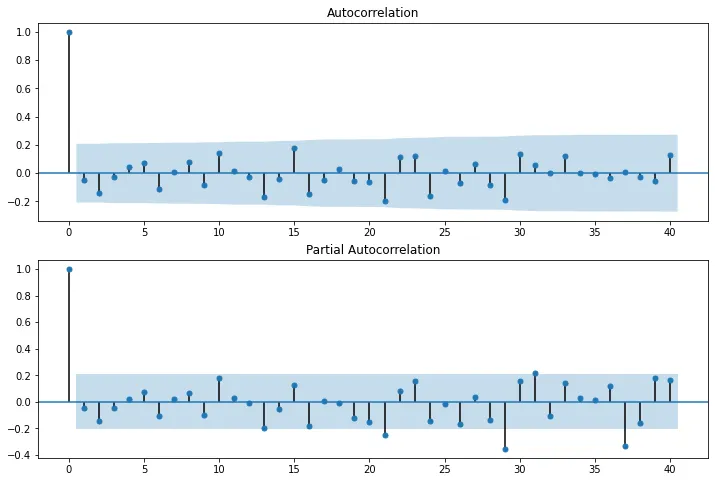

ACF 그래프는 시점 1 이후 모두 신뢰구간에 들어와있음     
PACF 그래프도 시점 1 이후 모두 신뢰구간에 들어와 있음

따라서 가장 적절한 차수 : p=1, q=1 -> ARMA(1,1)

## 1-2. 불안정 시계열

불안정 시계열 분석 프로세스
1. 비정상 시계열 데이터 (추세나 계절성 존재)
2. 정상성 확보 (차분이나 계절성 차분)
3. 정상 시계열
4. ARMA를 사용해 안정적 시계열 분석

즉, 안정적 시계열 모델에 정상성 확보 과정이 추가된 형태

#### 1. ARIMA (Autoregressive Integrated Moving Average)

$$
ARMA(p, q) + \text{차분} \rightarrow ARIMA(p,d,q)
$$

| 1. 백색잡음 | ARIMA(0,0,0) |
| --- | --- |
| 2. 자기회귀 | ARIMA(p,0,0) ⇔ AR(p) |
| 3. 이동평균 | ARIMA(0, 0, q) ⇔ MA(q) |
| 4. 랜덤워크 | 상수가 없는 ARIMA(0,1,0) |
| 5. 표류를 포함하는 랜덤워크 | 상수가 있는 ARIMA(0,1,0) |

랜덤워크 : 이전 값에 무작위 충격만 더해져서 예측 불가, 방향성이 존재하지 않음      
포류를 포함하는 랜덤워크 : 랜덤워크 모델에 상수항 추가, 상수항의 영향으로 방향성 존재

#### 2. SARIMA (Seasonal ARIMA)

$$
ARIMA(p,d,q) + \text{계절성(Seasonal) 차분} \\ \rightarrow SARIMA(p,d,q)(P, D, Q)_m
$$

- 시계열 데이터의 계절성을 처리할 수 있는 모델
- ARIMA 모델에 계절성 변동을 반영한 모델

- $(p, d, q)$: 비계절 ARIMA 파라미터
    - $p$ → AR의 차수
    - $d$ → 차분의 정도
    - $q$ → MA의 차수
- $(P, D, Q)$: 계절 ARIMA 파라미터
    - $P$ → 계절성 AR의 차수
    - $D$ → 계절성 차분의 정도
    - $Q$ → 계절성 MA의 차수
- $m$: 계절성 주기의 길이

불안정 시계열에서의 하이퍼파라미터 결정 방법
1. d, D (차분·계절 차분) 결정
    - ADF 단위근 검정으로 정상성 확보 여부 판단 후 결정
2. p, q (AR, MA 차수) 결정
    - 먼저 ACF, PACF로 범위를 추정
    - AIC, BIC 같은 정보 기준으로 그리드 서치 후 최종 선택

# 2. 다변량 시계열 분석

###  2-1. VAR(Vector Autoregression)

자기의 과거 값과 다른 변수들의 과거 값을 함께 사용하여 미래를 예측하는 모델

$$
X_t = a_{11} X_{t-1} + a_{12} Y_{t-1} + ε_{x,t}
$$

적합한 경우 
- 여러 경제 지표가 서로 영향을 주고받는 경우
- 금융 시장에서 여러 자산의 가격이 상호작용하는 경우
- 변수 간 상호 의존성이 중요한 경ㅇ

부적합한 경우
- 변수가 너무 많을 때
- 변수 간 관계가 명확하지 않을 때
- 장기 에측이 필요할 때

VAR에 사용할 변수 고르는법 : 그레인저 인과관계 검정 (X의 과거 정보가 Y의 미래 예측에 도움이 되는가?)
1. 모델 비교
    - 비제한 모델 : Y를 Y의 과거값 + X의 과거값으로 예측
2. 귀무가설
    - H0: X는 Y 예측에 도움이 안된다
    - H1: X는 Y 예측에 도임이 된다
3. 결론
    - P값이 0.05 보다 낮으면 X를 모델에 포함

VAR 모델을 활용한 분석 방법
1. 충격 반응 함수
    - 한 시계열에 특정 시점에서 충격이 발생할 때, 다른 시계열에 시간에 따라 어떤 영향을 주는지 분석
2. 예측오차 분산 분해
    - 어떤 시계열이 상대적으로 어떤 영향을 끼치고 있는지 중요도를 산출하기 위해서 진행
    - 각 변수가 미래의 움직임을 예측하는 데에 어느 정도의 기여를 하는지 평가하는 방법

장점
- 변수 간 양뱡향 영향 분석 가능
- 도메인 지식이 없어도 여러 변수를 함께 에측 가능
- 동시성 문제가 없음

단점
- 변수가 많으면 파라미터 폭발
- 장기적 관계 정보 손실 가능
- 상관관계는 인과관계와 다르다

# 3. 딥러닝을 활용한 시게열 분석

### 1. RNN 계열

1. RNN

이전 시점의 정보를 현재로 전달하는 순환 구조의 기본 신경망

적합한 경우
- 짧은~중간 길이의 시계열 (10~100)
- 순차적 의존성이 강한 데이터
- 자기상관이 큰 데이터

부적합한 경우
- 매우 긴 시계열 (장기 의존성 문제)
- 병렬 처리가 필요한 대규모 데이터

2. LSTM

게이트 메커니즘으로 장기 기억을 유지할 수 있도록 개선한 RNN

적합한 경우
- 장기 의존성이 중요한 경우 (100~1000)
- 중요한 과거 이벤트가 먼 미래에 영향을 주는 경우


3. GRU

LSTM을 단순화하여 더 빠르게 학습하면서도 비슷한 성능을 내는 모델

적합한 경우   
- STM처럼 장기 의존성이 필요하지만, 학습 속도가 중요한 경우
- 데이터가 상대적으로 적을 때 (파라미터가 적어 과적합 위험 낮다)
- 실시간 처리가 필요한 경우

### 2. Transformer 계열

어텐션 메커니즘으로 모든 시점을 동시에 참조해 병렬 처리하는 모델

적합한 경우
- 매우 긴 시계열 (1000+)
- 전역 패턴이 중요한 경우 (연간 계절성, 장기 트렌드)
- 대규모 데이터 (병렬 연산 활용)
- 다변량 시계열 (변수 간 상호작용 학습)

부적합한 경우
- 짧은 시계열 (과적합 위험)
- 계산 자원이 제한된 경우

### 3. Foundation Model

Foundation Model : 거대한 데이터로 사전 학습하여 다양한 문제를 해결할 수 있는 범용 모델

특징
- 특정 문제 X
- 범용적
- 사전 학습 후 파인튜닝으로 특화

1. LLM 기반 모델

대규모 언어 모델의 패턴 인식 능력을 시계열에 활용하는 접근법

2. 자체 거대 모델

대규모 시계열 데이터로 사전 학습하여 다양한 예측 문제에 범용적으로 적용 가능한 모델